**<h1> Анализ данных и прогноз продаж компьютерных игр**

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит интернет - магазину "Стримчик", который продаёт по всему миру компьютерные игры, сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Представлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Цель проекта**

Провести исследовательский анализ данных, проверить гипотезы для роста бизнеса.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.



**План работы**

1. Загрузим данные и изучим общую информацию;
2. Проведём предобработку данных;
3. Проведём исследовательский анализ данных;
4. Составим портрет пользователя каждого региона;
5. Проверим гипотезы;
6. Напишем общий вывод.

# Шаг 1. Загрузим данные и изучим общую информацию

**Импортируем необходимые библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind
import seaborn as sns

**Загрузим данные и изучим общую информацию**

In [2]:
games_sales = pd.read_csv('/datasets/games.csv')

In [3]:
games_sales.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   Name             16713 non-null  object 
, 1   Platform         16715 non-null  object 
, 2   Year_of_Release  16446 non-null  float64
, 3   Genre            16713 non-null  object 
, 4   NA_sales         16715 non-null  float64
, 5   EU_sales         16715 non-null  float64
, 6   JP_sales         16715 non-null  float64
, 7   Other_sales      16715 non-null  float64
, 8   Critic_Score     8137 non-null   float64
, 9   User_Score       10014 non-null  object 
, 10  Rating           9949 non-null   object 
,dtypes: float64(6), object(5)
,memory usage: 1.4+ MB


In [5]:
display(games_sales.duplicated().sum())

0

In [6]:
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   Name             16713 non-null  object 
, 1   Platform         16715 non-null  object 
, 2   Year_of_Release  16446 non-null  float64
, 3   Genre            16713 non-null  object 
, 4   NA_sales         16715 non-null  float64
, 5   EU_sales         16715 non-null  float64
, 6   JP_sales         16715 non-null  float64
, 7   Other_sales      16715 non-null  float64
, 8   Critic_Score     8137 non-null   float64
, 9   User_Score       10014 non-null  object 
, 10  Rating           9949 non-null   object 
,dtypes: float64(6), object(5)
,memory usage: 1.4+ MB


In [7]:
display(games_sales.loc[:, 'Name':'Year_of_Release'].value_counts())

Name                              Platform  Year_of_Release
Madden NFL 13                     PS3       2012.0             2
 Beyblade Burst                   3DS       2016.0             1
Ratatouille                       PC        2007.0             1
Rapala Tournament Fishing!        X360      2006.0             1
Rapala Trophies                   PSP       2006.0             1
                                                              ..
Halo Wars                         X360      2009.0             1
Halo: Combat Evolved              PC        2003.0             1
                                  XB        2001.0             1
Halo: Combat Evolved Anniversary  X360      2011.0             1
¡Shin Chan Flipa en colores!      DS        2007.0             1
Length: 16443, dtype: int64

In [8]:
games_sales[games_sales['Name'] == 'Madden NFL 13']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [9]:
games_sales.drop(16230, inplace=True)
display(games_sales.loc[:, 'Name':'Year_of_Release'].value_counts())

Name                              Platform  Year_of_Release
 Beyblade Burst                   3DS       2016.0             1
Reactor                           2600      1981.0             1
Rapala Tournament Fishing!        Wii       2006.0             1
                                  X360      2006.0             1
Rapala Trophies                   PSP       2006.0             1
                                                              ..
Halo Wars                         X360      2009.0             1
Halo: Combat Evolved              PC        2003.0             1
                                  XB        2001.0             1
Halo: Combat Evolved Anniversary  X360      2011.0             1
¡Shin Chan Flipa en colores!      DS        2007.0             1
Length: 16443, dtype: int64

In [10]:
games_sales.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод:**

В результате изучения общей информации о данных, выяснили, что:

- games_sales содержит 16715 строк;
- присутствуют столбцы с неподходящим типом данных (Year_of_Release - тип float вместо integer; Critic_Score - тип float, должен быть - integer; User_Score - тип object, должен быть - float);
- дубликаты отсутствуют;
- присутствуют пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.

# Шаг 2. Проведём предобработку данных

**Заменим названия столбцов (приведем к нижнему регистру)**

In [11]:
games_sales.columns = games_sales.columns.str.lower()
games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Преобразуем данные в нужные типы и обработаем пропуски**

**Переведём столбцы year_of_release и critic_score в формат Int64 так как это целочисленные значения**

In [12]:
games_sales['year_of_release'] = games_sales['year_of_release'].astype('Int64')
games_sales['critic_score'] = games_sales['critic_score'].astype('Int64')
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 16714 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             16712 non-null  object 
, 1   platform         16714 non-null  object 
, 2   year_of_release  16445 non-null  Int64  
, 3   genre            16712 non-null  object 
, 4   na_sales         16714 non-null  float64
, 5   eu_sales         16714 non-null  float64
, 6   jp_sales         16714 non-null  float64
, 7   other_sales      16714 non-null  float64
, 8   critic_score     8136 non-null   Int64  
, 9   user_score       10013 non-null  object 
, 10  rating           9948 non-null   object 
,dtypes: Int64(2), float64(4), object(5)
,memory usage: 1.6+ MB


**Переведём столбец user_score в формат float 64 так как оценка пользователей это дробное значение**

**Получили ошибку перевода в необходимый формат, попробуем разобраться в чём дело**

In [13]:
games_sales['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Видим среди уникальных числовых дробных значений  есть пропущенные значения и значение 'tbd'. Узнаем что это означает. Поисковик "Яндекс" выдаёт такую информмацию по запросу - Аббревиатура "tbd" означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с ангилийского "to be defined". Соответственно, можем заменить значение на NaN**

In [14]:
games_sales['user_score'] = games_sales['user_score'].replace('tbd', np.NaN)
games_sales['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
games_sales['user_score'] = games_sales['user_score'].astype('float64')

In [16]:
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 16714 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             16712 non-null  object 
, 1   platform         16714 non-null  object 
, 2   year_of_release  16445 non-null  Int64  
, 3   genre            16712 non-null  object 
, 4   na_sales         16714 non-null  float64
, 5   eu_sales         16714 non-null  float64
, 6   jp_sales         16714 non-null  float64
, 7   other_sales      16714 non-null  float64
, 8   critic_score     8136 non-null   Int64  
, 9   user_score       7589 non-null   float64
, 10  rating           9948 non-null   object 
,dtypes: Int64(2), float64(5), object(4)
,memory usage: 1.6+ MB


**Удалим строки с пропушенными значениями в столбцах name, genre и year_of_release так как их количество незначительно и удаление не повлияет на ход исследования**

In [17]:
games_sales = games_sales.dropna(subset = ['name', 'genre', 'year_of_release'])
games_sales.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

**Пропуски в столбцах critic_score, user_score оставим так как замена на другие числовые значения, медианные и т.д., может привести к неправильному дальнейшему анализу данных. По той же причине оставим пропуски в столбце rating**

**Возможные причины, которые могли привести к пропускам, это:
отсутствие рейтингов и оценок ввиду непопулярности игр, технические ошибки**

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [18]:
games_sales['world_sales'] = games_sales[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


**Вывод:**

Провели предобработку данных, в результате которой:

- Заменили названия столбцов (привели к нижнему регистру);
- преобразовали данные в правильные типы;
- обработали пропущенные значения;
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

# Шаг 3. Проведём исследовательский анализ данных

- **Рассмотрим сколько игр выпускалось в разные годы и важны ли данные за все периоды**

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


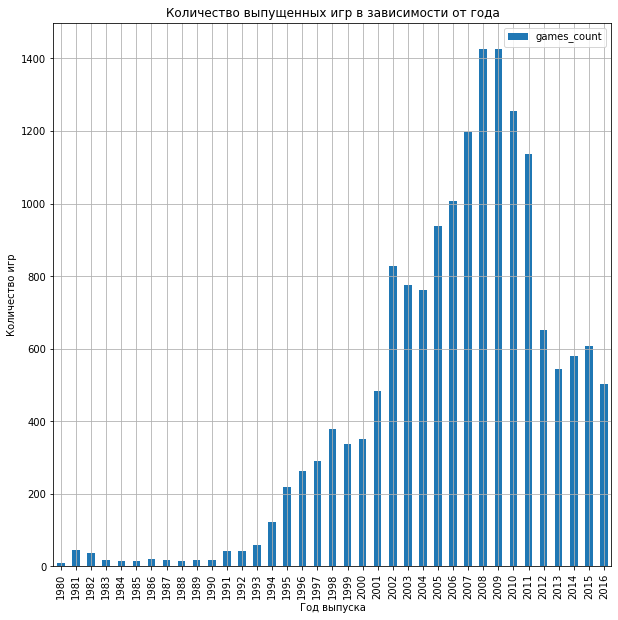

In [20]:
year_of_release_pivot_table = pd.pivot_table(games_sales, index = 'year_of_release',\
values = 'name', aggfunc = 'count')
year_of_release_pivot_table.columns = ['games_count']
display(year_of_release_pivot_table)
year_of_release_pivot_table.plot(kind = 'bar', grid = True, figsize = (10,10));
plt.title('Количество выпущенных игр в зависимости от года')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска') 
plt.show()

**Вывод: 
Данные за все периоды не важны так как с 1980 года по 1994 год игр выпускалось очень мало. Двукратные скачки в количестве выпуска игр по сравнению с предыдущими годами замечены в 1995 году, затем в 2001 году, затем в 2002 году. Самый пик выпуска количества игр приходится на 2008 и 2009 годы. После 2010 года отмечается резкое падение выпуска игр и постепенный спад вплоть до 2016 года.**

- **Рассмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы?**

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


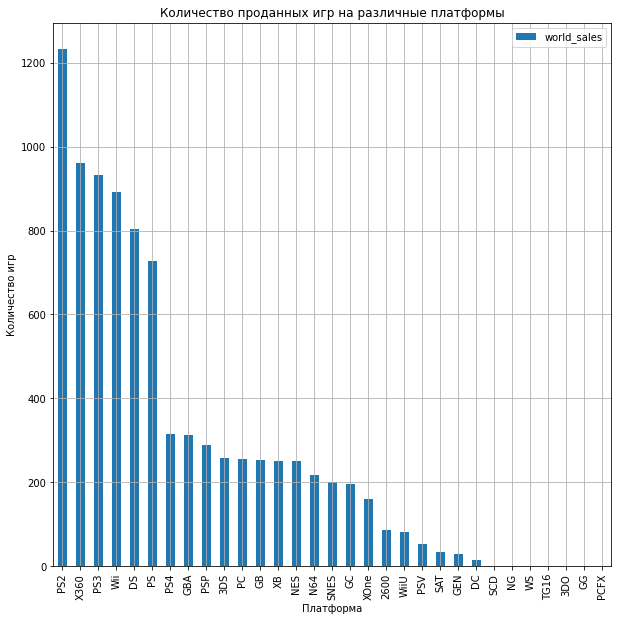

In [21]:
platform_sales_pivot_table = pd.pivot_table(games_sales, index=['platform'], values='world_sales',aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('world_sales',ascending=False)
display(platform_sales_pivot_table)
platform_sales_pivot_table.plot(kind = 'bar', grid = True, figsize = (10,10));
plt.title('Количество проданных игр на различные платформы')
plt.ylabel('Количество игр')
plt.xlabel('Платформа') 
plt.show()

**По полученным значениям видим, что явно лидируют 6 платформ - PS2, X360, PS3, Wii, DS, PS - рассмотрим продажи игр на эти платформы по годам**

Платформа  PS2


world_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

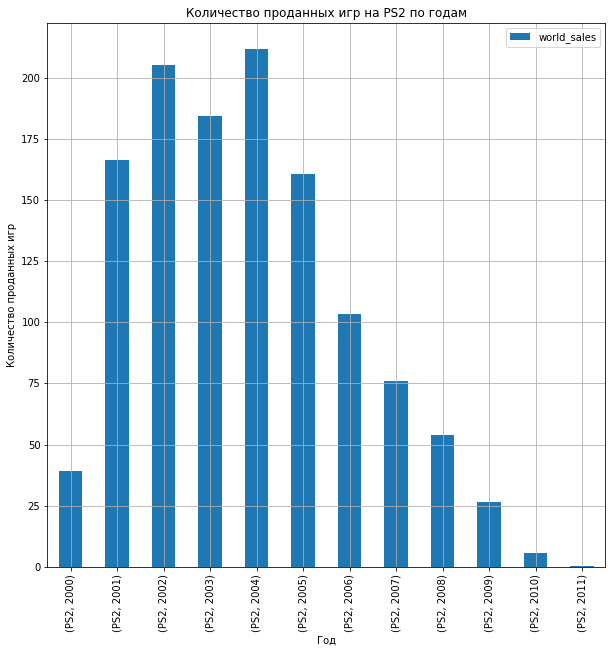

In [22]:
print('Платформа ','PS2')
platform_sales_pivot_table = pd.pivot_table(games_sales.query('platform == "PS2"'), 
index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
display(platform_sales_pivot_table)
platform_sales_pivot_table.plot(kind = 'bar', grid = True, figsize = (10,10));
plt.title('Количество проданных игр на PS2 по годам')
plt.ylabel('Количество проданных игр')
plt.xlabel('Год') 
plt.show()

Платформа  X360


world_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

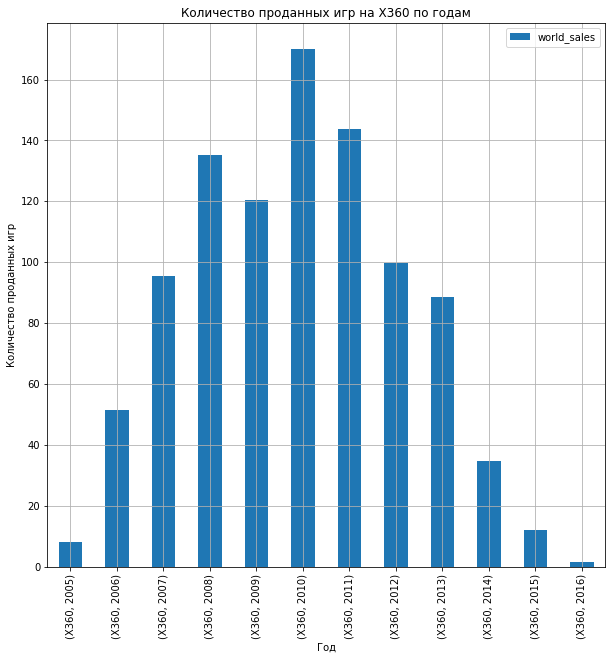

In [23]:
print('Платформа ','X360')
platform_sales_pivot_table = pd.pivot_table(games_sales.query('platform == "X360"'), 
index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
display(platform_sales_pivot_table)
platform_sales_pivot_table.plot(kind = 'bar', grid = True, figsize = (10,10));
plt.title('Количество проданных игр на X360 по годам')
plt.ylabel('Количество проданных игр')
plt.xlabel('Год') 
plt.show()

Платформа  PS3


world_sales
platform year_of_release             
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.35
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60

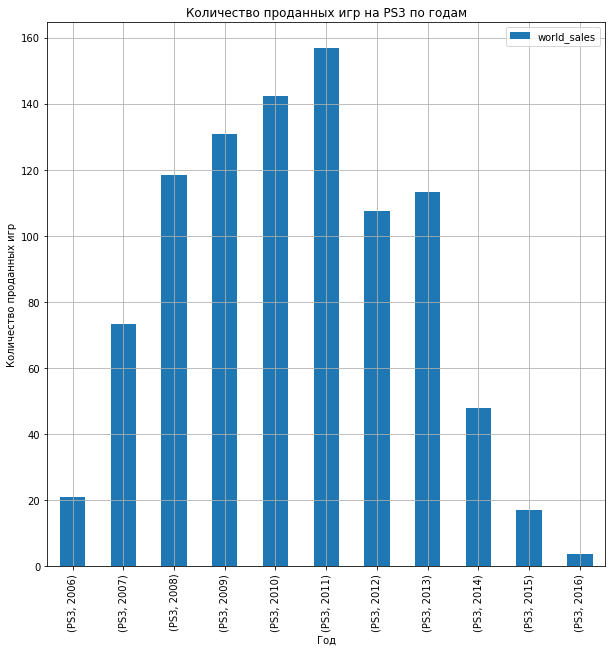

In [24]:
print('Платформа ','PS3')
platform_sales_pivot_table = pd.pivot_table(games_sales.query('platform == "PS3"'), 
index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
display(platform_sales_pivot_table)
platform_sales_pivot_table.plot(kind = 'bar', grid = True, figsize = (10,10));
plt.title('Количество проданных игр на PS3 по годам')
plt.ylabel('Количество проданных игр')
plt.xlabel('Год') 
plt.show()

Платформа  Wii


world_sales
platform year_of_release             
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18

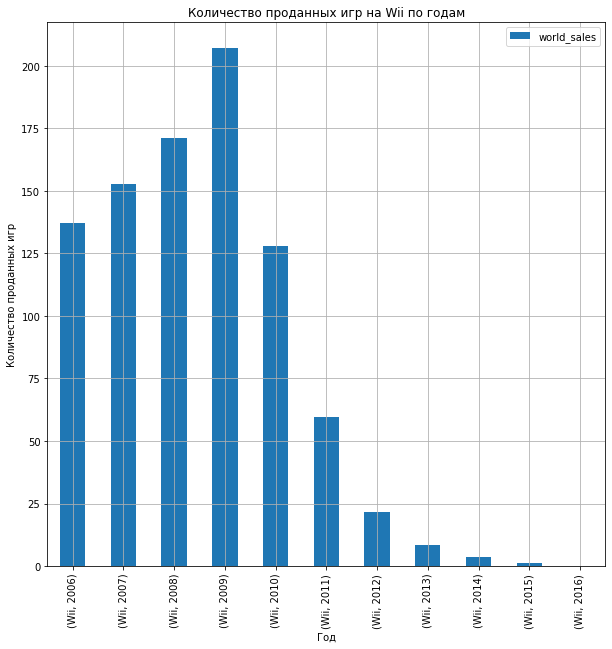

In [25]:
print('Платформа ','Wii')
platform_sales_pivot_table = pd.pivot_table(games_sales.query('platform == "Wii"'), 
index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
display(platform_sales_pivot_table)
platform_sales_pivot_table.plot(kind = 'bar', grid = True, figsize = (10,10));
plt.title('Количество проданных игр на Wii по годам')
plt.ylabel('Количество проданных игр')
plt.xlabel('Год') 
plt.show()

Платформа  DS


world_sales
platform year_of_release             
DS       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54

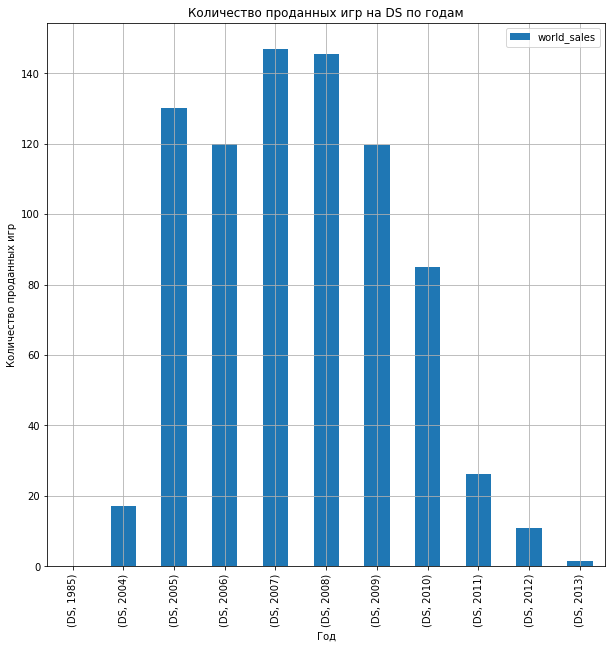

In [26]:
print('Платформа ','DS')
platform_sales_pivot_table = pd.pivot_table(games_sales.query('platform == "DS"'), 
index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
display(platform_sales_pivot_table)
platform_sales_pivot_table.plot(kind = 'bar', grid = True, figsize = (10,10));
plt.title('Количество проданных игр на DS по годам')
plt.ylabel('Количество проданных игр')
plt.xlabel('Год') 
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Много повторяющегося кода. Следовало создать список из наименований платформ и в цикле строить диаграммы, перебирая платформы из этого списка.</font><br>
<font color='DarkMagenta'>👉 Наверное, стоило попробовать разобраться с таким артефактом у платформы DS. Тогда бы обнаружили, что это ошибка, так как в 1985 году этой платформы еще не существовало. Визуализация помогает не только определять закономерности, но еще и находить ошибки.</font>
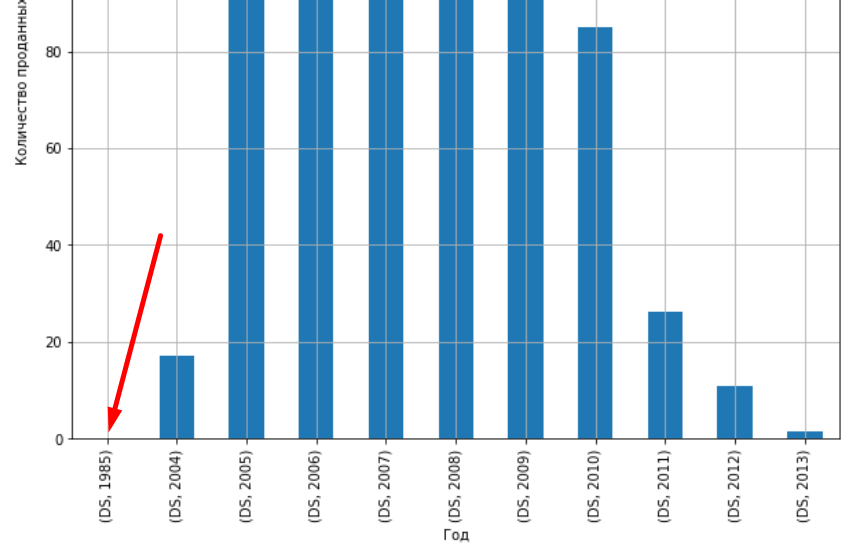

**Вывод: Исходя из полученных данных можем сделать вывод о том, что в среднем платформы живут по 10 лет. Однако активный период продаж игр для исследуемых платформ составляет примерно 4 года. Из всех рассматриваемых платформ - лидеров ни одна не сохранила актуальность.**

In [27]:
# Комментарий ревьюера
temp = games_sales.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

- **Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

**Вывод:
Учитывая исследование, приведённое выше, считаю правильным для дальнейшего анализа выбор периода с 2013 по 2016 года. Сделаем выборку по данным годам для дальнейшей работы с этими данными**

In [28]:
actual_games_sales = games_sales.query('year_of_release > 2012')
actual_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 2233 entries, 16 to 16714
,Data columns (total 12 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             2233 non-null   object 
, 1   platform         2233 non-null   object 
, 2   year_of_release  2233 non-null   Int64  
, 3   genre            2233 non-null   object 
, 4   na_sales         2233 non-null   float64
, 5   eu_sales         2233 non-null   float64
, 6   jp_sales         2233 non-null   float64
, 7   other_sales      2233 non-null   float64
, 8   critic_score     991 non-null    Int64  
, 9   user_score       1192 non-null   float64
, 10  rating           1256 non-null   object 
, 11  world_sales      2233 non-null   float64
,dtypes: Int64(2), float64(6), object(4)
,memory usage: 231.2+ KB


In [29]:
actual_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


- **Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.**

In [30]:
best_sales_platform = pd.pivot_table(actual_games_sales, index=['platform','year_of_release'], 
values='world_sales', aggfunc = 'sum')
display(best_sales_platform)

world_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


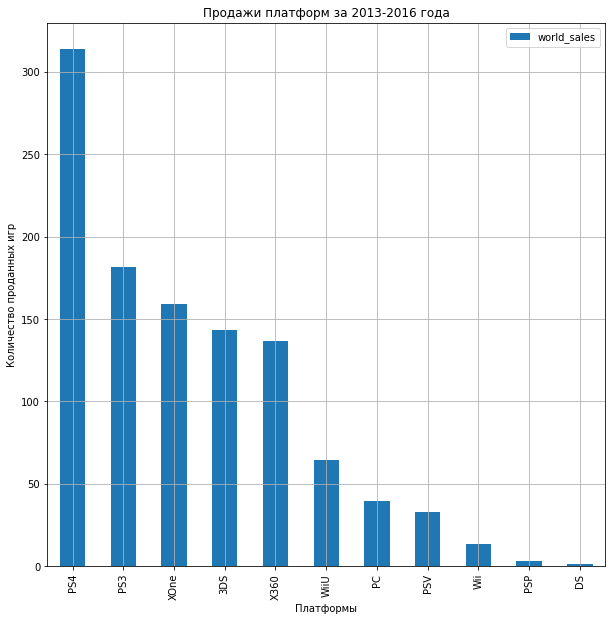

In [31]:
best_sales_platform = pd.pivot_table(actual_games_sales, index='platform', 
values='world_sales', aggfunc = 'sum')
display(best_sales_platform.sort_values('world_sales', ascending=False))
best_sales_platform.sort_values('world_sales', ascending=False).plot(kind = 'bar', grid = True, figsize = (10,10));
plt.title('Продажи платформ за 2013-2016 года')
plt.ylabel('Количество проданных игр')
plt.xlabel('Платформы') 
plt.show()

**Вывод:
По продажам лидируют: PS4, PS3, XOne, 3DS, X360. Рост продаж зафиксирован у PS4 и XOne - данные платформы. выглядят наиболее привлекательными с точки зрения роста продаж. Спад в остальных платформах объясняется их 'старением'.**

- **Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**

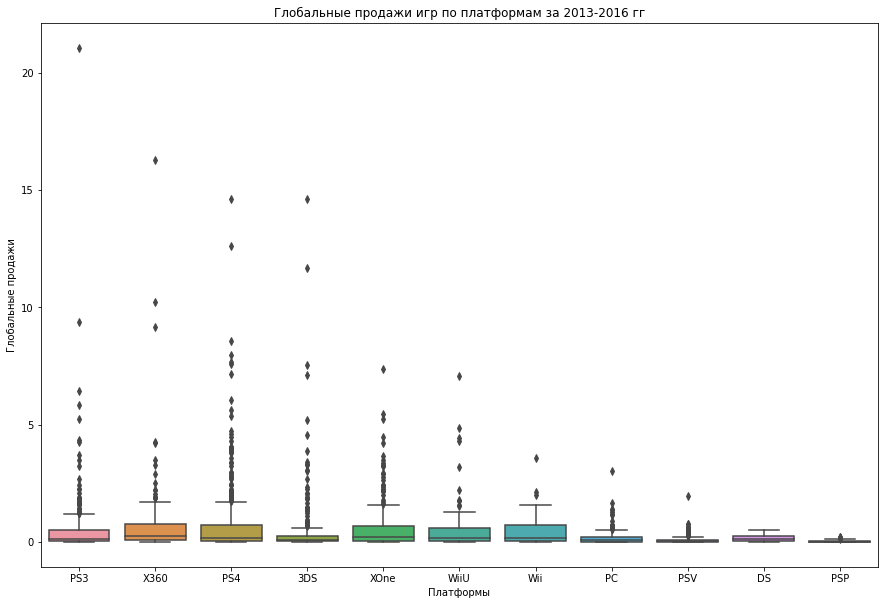

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: world_sales, dtype: float64

In [32]:
plt.figure(figsize=(15, 10))
(sns.boxplot(data = actual_games_sales, y = 'world_sales', x='platform')
.set(title = 'Глобальные продажи игр по платформам за 2013-2016 гг', 
xlabel = 'Платформы', 
ylabel = 'Глобальные продажи'))
plt.show()
actual_games_sales['world_sales'].describe()

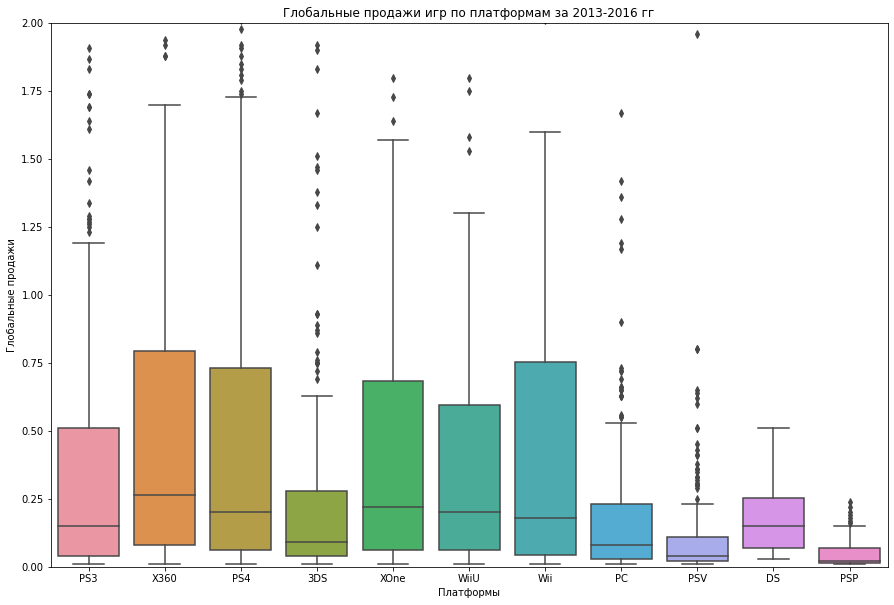

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: world_sales, dtype: float64

In [33]:
plt.figure(figsize=(15, 10))
(sns.boxplot(data = actual_games_sales, y = 'world_sales', x='platform')
.set(title = 'Глобальные продажи игр по платформам за 2013-2016 гг', 
xlabel = 'Платформы', 
ylabel = 'Глобальные продажи',
ylim=(0, 2)))
plt.show()
actual_games_sales['world_sales'].describe()

**По полученным данным делаем следующий вывод:**
- Медиана продаж у большинства платформ находится примерно на одном уровне - 200 тыс. копий. Средняя продаж по миру составляет 488 тыс. Наблюдается много выбросов по некоторым платформам. Рекордные продажи - 21 млн. Учитывая медианные значения выше средних, много выбросов, что значит много продаваемых игр, выглядят хорошо PS4, PS3, XOne, X360, однако наиболее перспективными платформами считаю PS4, XOne ввиду того, что они являются более новыми платформами.

- **Посмотрим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

In [34]:
PS4_actual_games_sales = actual_games_sales.query('platform =="PS4"')
PS4_scores = PS4_actual_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
PS4_scores.head()

,world_sales,critic_score,user_score
31,14.63,<NA>,NaN
42,12.62,97,8.3
77,8.58,82,4.3
87,7.98,<NA>,NaN
92,7.66,83,5.7


In [35]:
PS4_scores.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


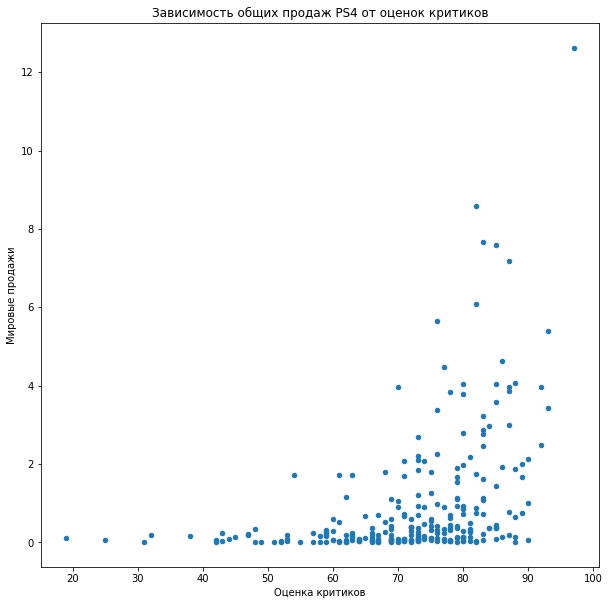

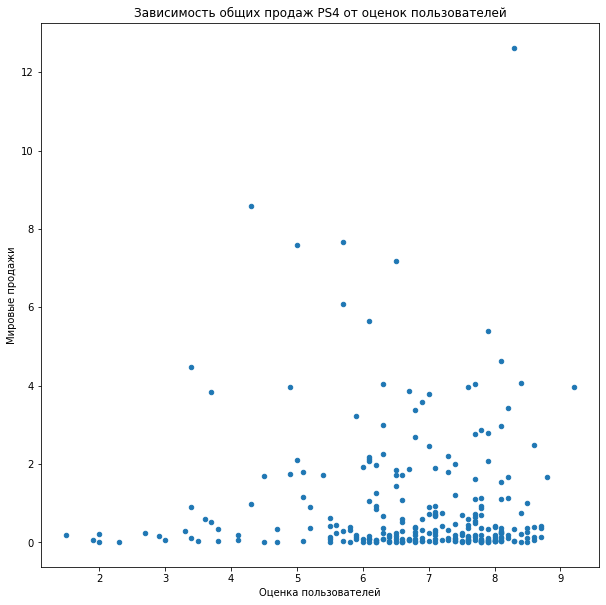

In [36]:
PS4_scores.plot(kind='scatter', x='critic_score', y='world_sales', 
title='Зависимость общих продаж PS4 от оценок критиков', xlabel='Оценка критиков',
ylabel='Мировые продажи', figsize = (10,10));
PS4_scores.plot(kind='scatter', x='user_score', y='world_sales', 
title='Зависимость общих продаж PS4 от оценок пользователей', xlabel='Оценка пользователей',
ylabel='Мировые продажи', figsize = (10,10));


**Вывод:
В результате проверки корреляции получили, что оценка пользователей никак не влияет на продажи игр, но оценка критиков хоть и не сильно, но все же оказывает влияние на продажи (корреляция составляет 0,4).**

- **Соотнесем выводы с продажами игр на других платформах**

In [37]:
actual_games_sales_perspect = actual_games_sales.query('platform ==["PS3", "XOne", "X360"]')

In [38]:
scores = actual_games_sales_perspect.loc[:,['world_sales', 'critic_score', 'user_score']]

________________________________________
,PS3


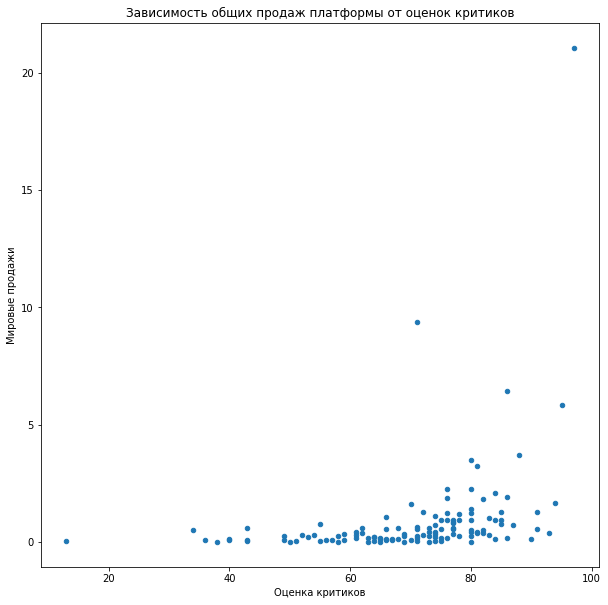

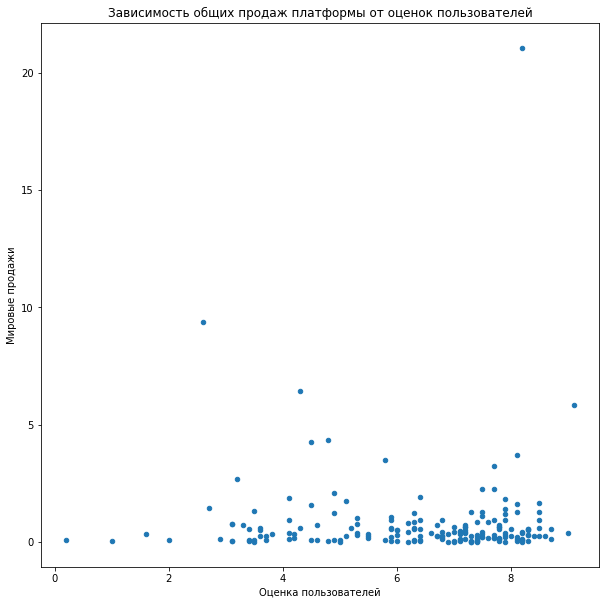

year_of_release   -0.201274
,na_sales           0.954921
,eu_sales           0.974740
,jp_sales           0.516258
,other_sales        0.989812
,critic_score       0.334285
,user_score         0.002394
,world_sales        1.000000
,Name: world_sales, dtype: float64
,________________________________________
,X360


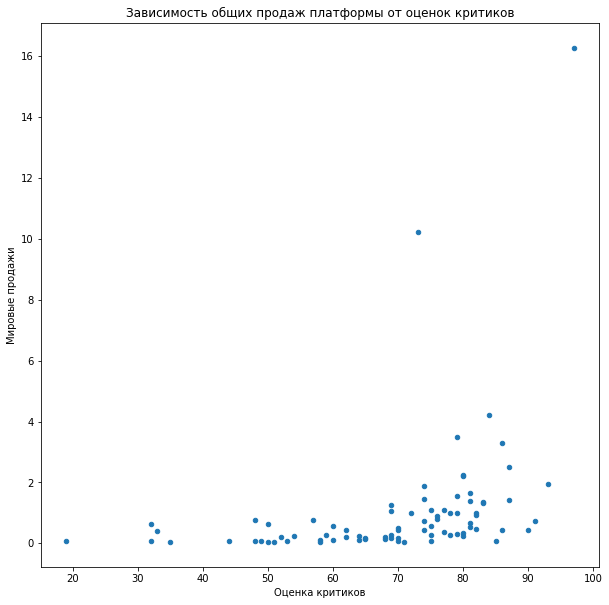

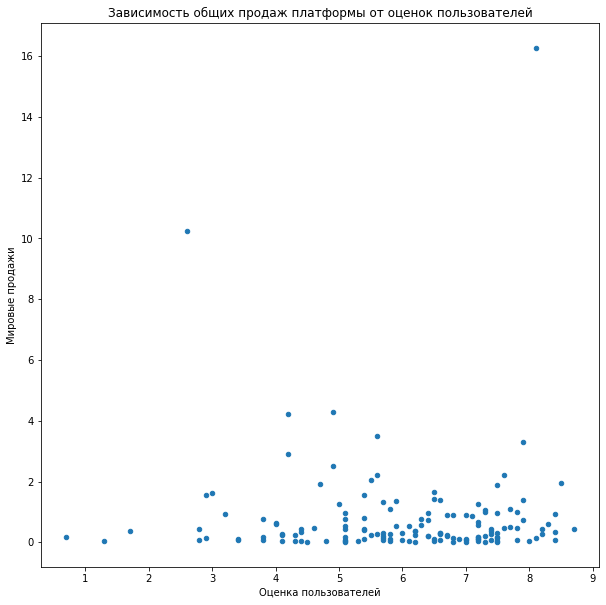

year_of_release   -0.220495
,na_sales           0.984299
,eu_sales           0.941008
,jp_sales           0.648860
,other_sales        0.998640
,critic_score       0.350345
,user_score        -0.011742
,world_sales        1.000000
,Name: world_sales, dtype: float64
,________________________________________
,XOne


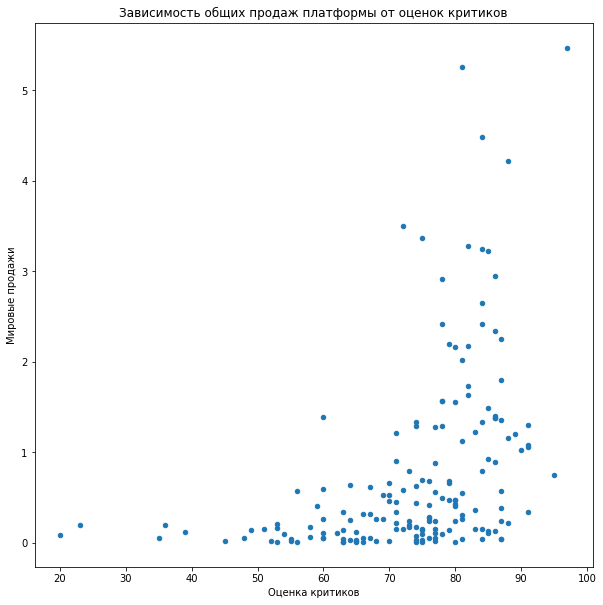

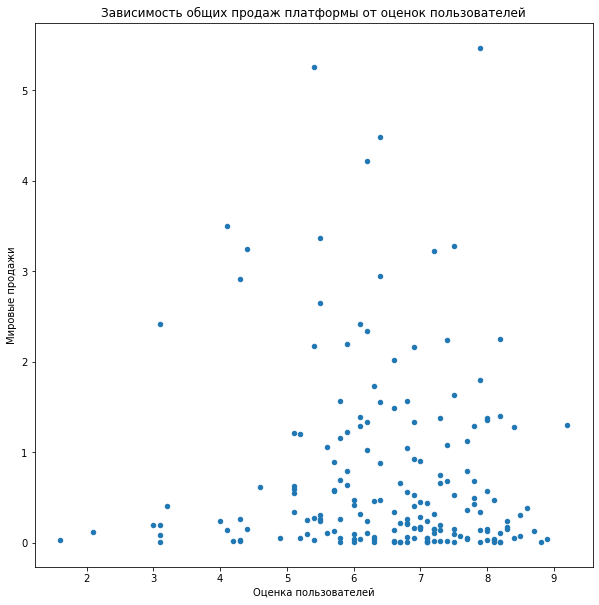

year_of_release   -0.239183
,na_sales           0.970433
,eu_sales           0.898045
,jp_sales           0.452701
,other_sales        0.995238
,critic_score       0.416998
,user_score        -0.068925
,world_sales        1.000000
,Name: world_sales, dtype: float64


In [39]:
for platform, scores in actual_games_sales_perspect.groupby('platform'):
    print('_'*40)
    print(platform)
    scores.plot(
        kind = 'scatter', 
        x = 'critic_score', 
        y = 'world_sales',
        title = 'Зависимость общих продаж платформы от оценок критиков', 
        xlabel = 'Оценка критиков',
        ylabel = 'Мировые продажи', 
        figsize = (10,10))
    scores.plot(
        kind = 'scatter', 
        x = 'user_score', 
        y = 'world_sales',
        title = 'Зависимость общих продаж платформы от оценок пользователей', 
        xlabel = 'Оценка пользователей',
        ylabel = 'Мировые продажи', 
        figsize = (10,10))
    plt.show()
    print(scores.corr()['world_sales'])

**Вывод:
В результате проверки корреляции остальных платформ получили идентичную картину: оценка пользователей никак не влияет на продажи игр, но оценка критиков хоть и не сильно, но все же оказывает влияние на продажи (корреляция на исследуемых платформах составила 0,3 - 0,4).**

- **Посмотрим на общее распределение игр по жанрам. Выясним, что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [40]:
profit_genre = pd.pivot_table(actual_games_sales, index='genre', values=('name', 'world_sales'),\
aggfunc=({'name':'count', 'world_sales':'sum'}))
profit_genre.sort_values('world_sales', ascending=False)

,name,world_sales
genre,,
Action,766,321.87
Shooter,187,232.98
Sports,214,150.65
Role-Playing,292,145.89
Misc,155,62.82
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


In [41]:
profit_genre['profit'] = profit_genre['world_sales']/profit_genre['name']
profit_genre.sort_values('profit', ascending=False)

,name,world_sales,profit
genre,,,
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972
Platform,74,42.63,0.576081
Role-Playing,292,145.89,0.499623
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Action,766,321.87,0.420196
Misc,155,62.82,0.405290
Simulation,62,21.76,0.350968


**Вывод:
Самыми популярными жанрами (высокие продажи) являются Action, Shooter, Sports, Role-Playing. Самые непопулярные - Adventure, Simulation, Strategy, Puzzle. 
Самыми прибыльными жанрами являются Shooter, Sports, Platform, Role-Playing. Самые неприбыльные - Simulation, Puzzle, Strategy, Adventure**

**Общий вывод по шагу 3 - провели исследовательский анализ данных**

-  Данные за все периоды не важны так как с 1980 года по 1994 год игр выпускалось очень мало. Двукратные скачки в количестве выпуска игр по сравнению с предыдущими годами замечены в 1995 году, затем в 2001 году, затем в 2002 году. Самый пик выпуска количества игр приходится на 2008 и 2009 годы. После 2010 года отмечается резкое падение выпуска игр и постепенный спад вплоть до 2016 года;

- Исходя из полученных данных можем сделать вывод о том, что в среднем платформы живут по 10 лет. Однако активный период продаж игр для исследуемых платформ составляет примерно 4 года. Из всех рассматриваемых платформ - лидеров ни одна не сохранила актуальность;

- По продажам за период с 2013 по 2016 года лидируют: PS4, PS3, XOne, 3DS, X360. Рост продаж зафиксирован у PS4 и XOne - данные платформы. выглядят наиболее привлекательными с точки зрения роста продаж. Спад в остальных платформах объясняется их 'старением';


- Медиана продаж у большинства платформ находится примерно на одном уровне - 200 тыс. копий. Средняя продаж по миру составляет 488 тыс. Наблюдается много выбросов по некоторым платформам. Рекордные продажи - 21 млн. Учитывая медианные значения выше средних, много выбросов, что значит много продаваемых игр, выглядят хорошо PS4, PS3, XOne, X360, однако наиболее перспективными патформами считаю PS4, XOne ввиду того, что они являются более новыми платформами;

- В результате проверки корреляции PS4 получили, что оценка пользователей никак не влияет на продажи игр, но оценка критиков хоть и не сильно, но все же оказывает влияние на продажи (корреляция составляет 0,4);

- В результате проверки корреляции остальных платформ получили идентичную картину: оценка пользователей никак не влияет на продажи игр, но оценка критиков хоть и не сильно, но все же оказывает влияние на продажи (корреляция на исследуемых платформах составила 0,3 - 0,4);

- Самыми популярными жанрами (высокие продажи) являются Action, Shooter, Sports, Role-Playing. Самые непопулярные - Adventure, Simulation, Strategy, Puzzle. Самыми прибыльными жанрами являются Shooter, Sports, Platform, Role-Playing. Самые неприбыльные - Simulation, Puzzle, Strategy, Adventure.


# Шаг 4. Составим портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишем различия в долях продаж.**


In [42]:
na_actual_games_sales = actual_games_sales.query('na_sales > 0')
na_actual_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 1309 entries, 16 to 16672
,Data columns (total 12 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             1309 non-null   object 
, 1   platform         1309 non-null   object 
, 2   year_of_release  1309 non-null   Int64  
, 3   genre            1309 non-null   object 
, 4   na_sales         1309 non-null   float64
, 5   eu_sales         1309 non-null   float64
, 6   jp_sales         1309 non-null   float64
, 7   other_sales      1309 non-null   float64
, 8   critic_score     809 non-null    Int64  
, 9   user_score       974 non-null    float64
, 10  rating           1011 non-null   object 
, 11  world_sales      1309 non-null   float64
,dtypes: Int64(2), float64(6), object(4)
,memory usage: 135.5+ KB


In [43]:
eu_actual_games_sales = actual_games_sales.query('eu_sales > 0')
eu_actual_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 1422 entries, 16 to 16692
,Data columns (total 12 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             1422 non-null   object 
, 1   platform         1422 non-null   object 
, 2   year_of_release  1422 non-null   Int64  
, 3   genre            1422 non-null   object 
, 4   na_sales         1422 non-null   float64
, 5   eu_sales         1422 non-null   float64
, 6   jp_sales         1422 non-null   float64
, 7   other_sales      1422 non-null   float64
, 8   critic_score     872 non-null    Int64  
, 9   user_score       1047 non-null   float64
, 10  rating           1086 non-null   object 
, 11  world_sales      1422 non-null   float64
,dtypes: Int64(2), float64(6), object(4)
,memory usage: 147.2+ KB


In [44]:
jp_actual_games_sales = actual_games_sales.query('jp_sales > 0')
jp_actual_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 1187 entries, 16 to 16714
,Data columns (total 12 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             1187 non-null   object 
, 1   platform         1187 non-null   object 
, 2   year_of_release  1187 non-null   Int64  
, 3   genre            1187 non-null   object 
, 4   na_sales         1187 non-null   float64
, 5   eu_sales         1187 non-null   float64
, 6   jp_sales         1187 non-null   float64
, 7   other_sales      1187 non-null   float64
, 8   critic_score     410 non-null    Int64  
, 9   user_score       462 non-null    float64
, 10  rating           475 non-null    object 
, 11  world_sales      1187 non-null   float64
,dtypes: Int64(2), float64(6), object(4)
,memory usage: 122.9+ KB


In [45]:
na_platform = pd.pivot_table(na_actual_games_sales, index='platform', values='na_sales',
aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_platform)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [46]:
eu_platform = pd.pivot_table(eu_actual_games_sales, index='platform', values='eu_sales',
aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_platform)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


In [47]:
jp_platform = pd.pivot_table(jp_actual_games_sales, index='platform', values='jp_sales',
aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_platform)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


**Вывод:**

- На рынке Северной Америки топ-5 выглядит так: PS4, XOne, X360, PS3, 3DS. Сохранена общая тенденция по популярности платформ, но в топ-3 входят два продукта компании Microsoft, которая является местной для Сев.- Американского рынка, возможно причина в этом.

- На Европейском рынке топ-5 выглядит так: PS4, PS3, XOne, X360,  3DS. Сохранена общая тенденция по популярности платформ.

- На рынке Японии топ-5 выглядит так: 3DS, PS3, PSV, PS4, WiiU. Рынок Японии отличается, сразу заметно, что наиболее популярны портативные платформы, а так же абсолютными лидерами являются продукты японской компании Sony.

**Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные жанры (топ-5). ОПоясним разницу.**


In [48]:
na_genre = pd.pivot_table(na_actual_games_sales, index='genre', values='na_sales',
aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_genre)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [49]:
eu_genre = pd.pivot_table(eu_actual_games_sales, index='genre', values='eu_sales',
aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_genre)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [50]:
jp_genre = pd.pivot_table(jp_actual_games_sales, index='genre', values='jp_sales',
aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_genre)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


**Вывод:**

- На рынке Северной Америки топ-5 жанров выглядит так: Action, Shooter, Sports, Role-Playing, Misc;

- На Европейском рынке топ-5 жанров выглядит так: Action, Shooter, Sports, Role-Playing, Racing; 

- На рынке Японии топ-5 жанров выглядит так: Role-Playing, Action, Misc, Fighting, Shooter;

- Отличия между любимыми жанрами Американцев и Европейцев - минимальны, топ-5 жанров для тех и других практически идентичен, но есть отличия - Американцы предпочитают жанр Misc, а Европейцам Больше нравится жанр Racing;

- Любимые жанры компьютерных игр Японцев отличаются от других стран возможно из-за популярности портативных устройств и в целом иной игровой культуры.

**Определим для пользователя каждого региона (NA, EU, JP):
Влияет ли рейтинг ESRB на продажи в отдельном регионе.**


In [51]:
na_ESRB = pd.pivot_table(na_actual_games_sales, index='rating', values='na_sales',
aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_ESRB)

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [52]:
eu_ESRB = pd.pivot_table(eu_actual_games_sales, index='rating', values='eu_sales',
aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_ESRB)

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [53]:
jp_ESRB = pd.pivot_table(jp_actual_games_sales, index='rating', values='jp_sales',
aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_ESRB)

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


**Вывод:**

- Для рынков Северной Америки и Европы продажи в зависимости от рейтинга ESRB одинаково распределены в таком порядке: M, E, E10+, T;

- Для рынка Японии продажи в зависимости от рейтинга ESRB распределены по-другому: T, E, M, E10+;

- Таким образом, в Северной Америке и Европе распространены игры 17+ , то есть взрослых пользователей, а в Японии лидирующие продажи с рейтингом Т - пользователи 13+ .


In [54]:
# Комментарий ревьюера
temp = actual_games_sales.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

977 0.43752798925212716


NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

**Общий вывод по шагу 4 - составили портрет пользователя каждого региона:**

- В регионе Северная Америка типичный пользователь возраста 17+ лет, играет на PS4 или XOne в игры жанра Action и Shooter;

- В Европейском регионе типичный пользователь возраста 17+ лет, играет на PS4 в игры жанра Action и Shooter;

- В Японском регионе типичный пользователь возраста 13+ лет, играет в портативные приставки в игры жанра Role-Playing и Action.

# Шаг 5. Проверим гипотезы

**Необходимо проверить гипотезу:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Выдвинем гипотезы: 

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Проверим гипотезы, используя исходные данные.
Для проверки гипотезы будем использовать t-критерий Стьюдента (выборки независимы между собой)

In [55]:
data_1 = actual_games_sales.query('platform == "XOne"')['user_score'].dropna()
data_2 = actual_games_sales.query('platform == "PC"')['user_score'].dropna()
print('Средний пользовательский рейтинг платформ XOne равен', round(data_1.mean(),1))
print('Средний пользовательский рейтинг платформ PC равен', round(data_2.mean(),1))


Средний пользовательский рейтинг платформ XOne равен 6.5
,Средний пользовательский рейтинг платформ PC равен 6.3


In [56]:
alpha = 0.05
result = st.ttest_ind(data_1, data_2, equal_var = True)
print ('p - значение:', result.pvalue)
if result.pvalue < alpha : 
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p - значение: 0.14012658403611647
,Не получилось отвергнуть нулевую гипотезу


**Вывод:
Нулевую гипотезу не получилось отвергнуть, значит средние пользовательские рейтинги, скорее всего, одинаковые. По вычисленным средним рейтингам значения хоть и не равны, но очень близки друг к другу.**

**Необходимо проверить гипотезу:
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Выдвинем гипотезы: 

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;

- H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

Проверим гипотезы, используя исходные данные.
Для проверки гипотезы будем использовать t-критерий Стьюдента (выборки независимы между собой)

In [57]:
data_3 = actual_games_sales.query('genre == "Action"')['user_score'].dropna()
data_4 = actual_games_sales.query('genre == "Sports"')['user_score'].dropna()
print('Средний пользовательский рейтинг жанра Action равен', round(data_3.mean(),1))
print('Средний пользовательский рейтинг жанра Sports равен', round(data_4.mean(),1))


Средний пользовательский рейтинг жанра Action равен 6.8
,Средний пользовательский рейтинг жанра Sports равен 5.2


In [58]:
alpha = 0.05
result = st.ttest_ind(data_3, data_4, equal_var = True)
print ('p - значение:', result.pvalue)
if result.pvalue < alpha : 
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p - значение: 1.0517832389140023e-27
,Отвергаем нулевую гипотезу


**Вывод:
Нулевая гипотеза отвергнута, значит, скорее всего, средние рейтинги жанров Action и Sports отличаются, что подтверждается по вычисленным средним значениям рейтингов.**

**Общий вывод по шагу 5 - проверка гипотез.**

- В ходе работ провели проверку двух гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- выдвинули по ним нулевые и альтернативные гипотезы;

- для проверки гипотез использовали t-критерий Стьюдента (так как выборки независимы между собой);

- в ходе проверки первой гипотезы установили, что средние пользовательские рейтинги платформ XOne и PC, скорее всего, одинаковые и подтвердили это вычислением средних значений рейтингов, которые оказались близки друг к другу;

- в ходе проверки второй гипотезы - нулевая гипотеза, которая гласила, что средние рейинги жанров Action и Sports одинаковы, была отвергнута. По посчитанным значениям средних рейтингов это подтвердилось, так как значения получились разные;

- для обоих случаев в разделе необходимо было сформулировать нулевую и альтернативную гипотезы. Нужно было проверить одинаковы ли или разные рейтинги, то есть, по сути, сравнить средние двух генеральных совокупностей, поэтому в обоих случаях нулевая гипотеза была сформулирована так: "средние значения совокупностей(в нашем случае средние пользовательские рейтинги) равны". Альтернативная гипотеза, в свою очередь, была сформулирована двусторонней, так как вопрос в том, одинаковые/разные ли рейтинги а не больше/меньше.

# Шаг 6. Общий вывод.

- В ходе работы было выполнено:

1. В результате изучения общей информации о данных, выяснили, что:

- games_sales содержит 16715 строк;
- присутствуют столбцы с неподходящим типом данных (Year_of_Release - тип float вместо integer; Critic_Score - тип float, должен быть - integer; User_Score - тип object, должен быть - float);
- явные дубликаты отсутствуют;
- присутствуют пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.

2. Провели предобработку данных, в результате которой:

- Заменили названия столбцов (привели к нижнему регистру);
- преобразовали данные в правильные типы;
- обработали пропущенные значения;
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

3. Провели исследовательский анализ данных

-  Данные за все периоды не важны так как с 1980 года по 1994 год игр выпускалось очень мало. Двукратные скачки в количестве выпуска игр по сравнению с предыдущими годами замечены в 1995 году, затем в 2001 году, затем в 2002 году. Самый пик выпуска количества игр приходится на 2008 и 2009 годы. После 2010 года отмечается резкое падение выпуска игр и постепенный спад вплоть до 2016 года;

- Исходя из полученных данных можем сделать вывод о том, что в среднем платформы живут по 10 лет. Однако активный период продаж игр для исследуемых платформ составляет примерно 4 года. Из всех рассматриваемых платформ - лидеров ни одна не сохранила актуальность;

- По продажам за период с 2013 по 2016 года лидируют: PS4, PS3, XOne, 3DS, X360. Рост продаж зафиксирован у PS4 и XOne - данные платформы. выглядят наиболее привлекательными с точки зрения роста продаж. Спад в остальных платформах объясняется их 'старением';


- Медиана продаж у большинства платформ находится примерно на одном уровне - 200 тыс. копий. Средняя продаж по миру составляет 488 тыс. Наблюдается много выбросов по некоторым платформам. Рекордные продажи - 21 млн. Учитывая медианные значения выше средних, много выбросов, что значит много продаваемых игр, выглядят хорошо PS4, PS3, XOne, X360, однако наиболее перспективными патформами считаю PS4, XOne ввиду того, что они являются более новыми платформами;

- В результате проверки корреляции PS4 получили, что оценка пользователей никак не влияет на продажи игр, но оценка критиков хоть и не сильно, но все же оказывает влияние на продажи (корреляция составляет 0,4);

- В результате проверки корреляции остальных платформ получили идентичную картину: оценка пользователей никак не влияет на продажи игр, но оценка критиков хоть и не сильно, но все же оказывает влияние на продажи (корреляция на исследуемых платформах составила 0,3 - 0,4);

- Самыми популярными жанрами (высокие продажи) являются Action, Shooter, Sports, Role-Playing. Самые непопулярные - Adventure, Simulation, Strategy, Puzzle. Самыми прибыльными жанрами являются Shooter, Sports, Platform, Role-Playing. Самые неприбыльные - Simulation, Puzzle, Strategy, Adventure.

4. Составили портрет пользователя каждого региона:

- В регионе Северная Америка типичный пользователь возраста 17+ лет, играет на PS4 или XOne в игры жанра Action и Shooter;

- В Европейском регионе типичный пользователь возраста 17+ лет, играет на PS4 в игры жанра Action и Shooter;

- В Японском регионе типичный пользователь возраста 13+ лет, играет в портативные приставки в игры жанра Role-Playing и Action.

5. Провели проверку двух гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- выдвинули по ним нулевые и альтернативные гипотезы;

- для проверки гипотез использовали t-критерий Стьюдента (так как выборки независимы между собой);

- в ходе проверки первой гипотезы установили, что средние пользовательские рейтинги платформ XOne и PC, скорее всего, одинаковые и подтвердили это вычислением средних значений рейтингов, которые оказались близки друг к другу;

- в ходе проверки второй гипотезы - нулевая гипотеза, которая гласила, что средние рейинги жанров Action и Sports одинаковы, была отвергнута. По посчитанным значениям средних рейтингов это подтвердилось, так как значения получились разные;

- для обоих случаев в разделе необходимо было сформулировать нулевую и альтернативную гипотезы. Нужно было проверить одинаковы ли или разные рейтинги, то есть, по сути, сравнить средние двух генеральных совокупностей, поэтому в обоих случаях нулевая гипотеза была сформулирована так: "средние значения совокупностей(в нашем случае средние пользовательские рейтинги) равны". Альтернативная гипотеза, в свою очередь, была сформулирована двусторонней, так как вопрос в том, одинаковые/разные ли рейтинги а не больше/меньше.


- В результате проведённого анализа могу рекомендовать для рекламной кампании в 2017 году :

- сделать акцент на играх для платформ: PS4 и XOne;
- учесть, что наиболее популярны жанры это экшены, шутеры и ролевые игры;
- обратить внимание на более популярную возрастную категорию и ориентироваться на пользователей возраста 17+;
- учесть особенности "рынка" пользователей для региона при международной торговле;
- учитывать отзывы критиков для прогноза продаж.